In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms
import torchvision

import os
import sys
sys.path.insert(0, "../utils")
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from tqdm import tqdm

import src.cityscapes_loader as cityscapes_loader


/home/user/sheludzk/anaconda3/envs/CudaLab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_root_dir = "/home/nfs/inf6/data/datasets/cityscapes/"

train_ds = cityscapes_loader.cityscapesLoader(root=dataset_root_dir, split='train', is_transform=True, img_size=(512, 1024), is_sequence=True)
val_ds = cityscapes_loader.cityscapesLoader(root=dataset_root_dir, split='val', img_size=(1024, 2048), is_transform=True, is_sequence=True)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=3, shuffle=True, num_workers=4, drop_last=True)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=3, shuffle=False, num_workers=4, drop_last=True)

Found 1885 train images
Found 235 val images


In [3]:
test = val_ds[1]

In [4]:
test[0].shape

torch.Size([30, 3, 1024, 2048])

torch.Size([1, 1024, 2048])


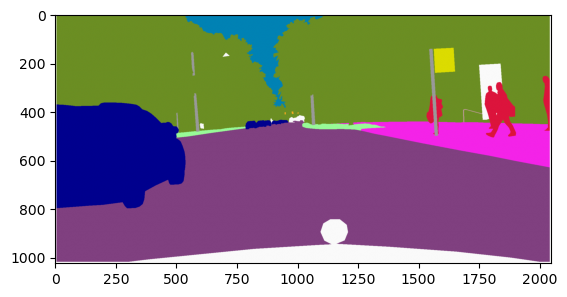

In [5]:
test_label = test[1]
print(test_label.shape)
test_label = val_ds.decode_segmap(test_label.numpy()[0])
# display the image
plt.imshow(test_label)

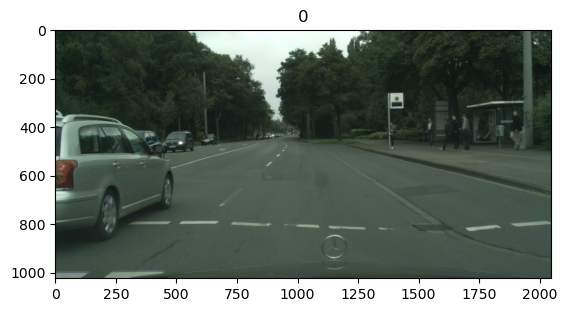

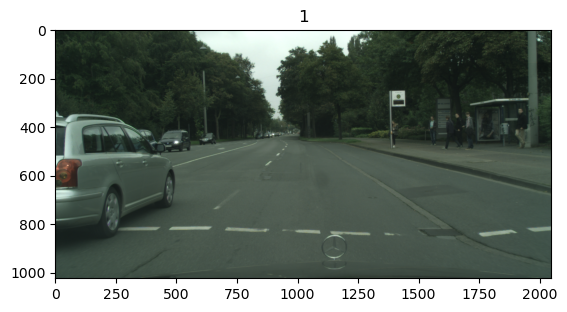

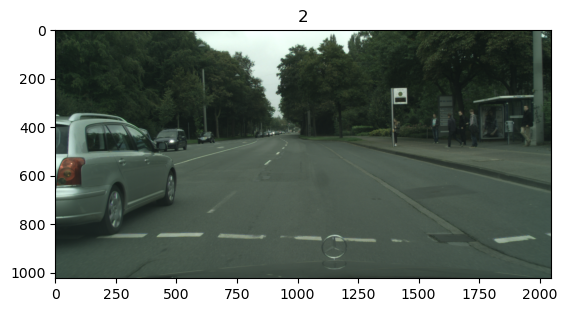

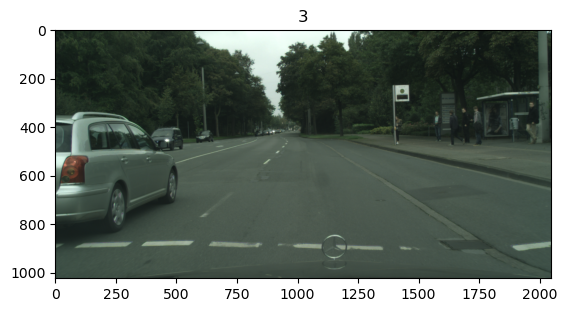

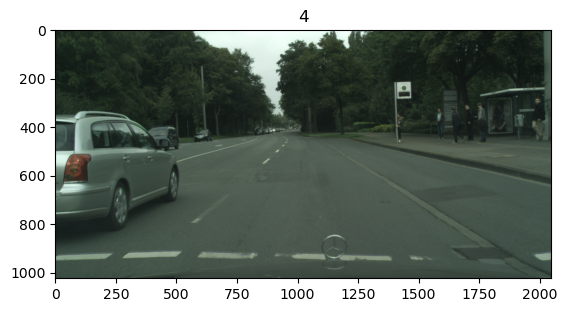

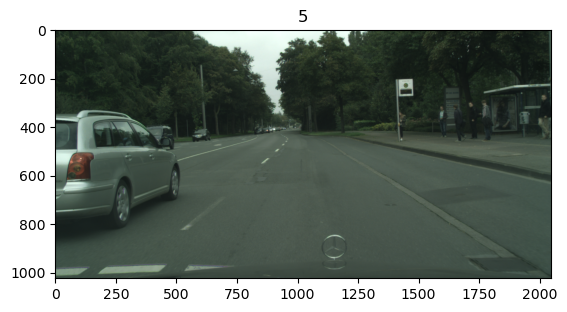

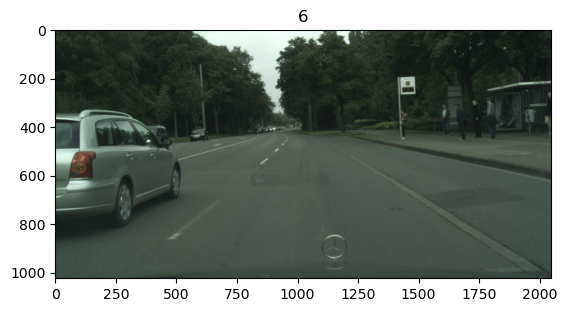

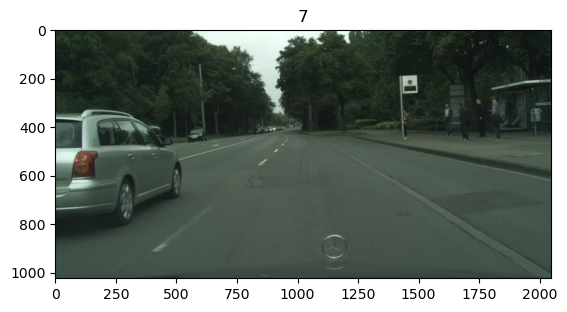

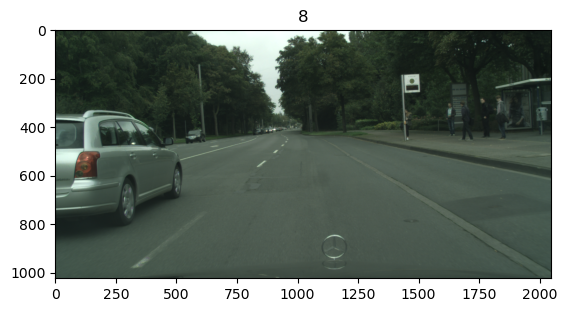

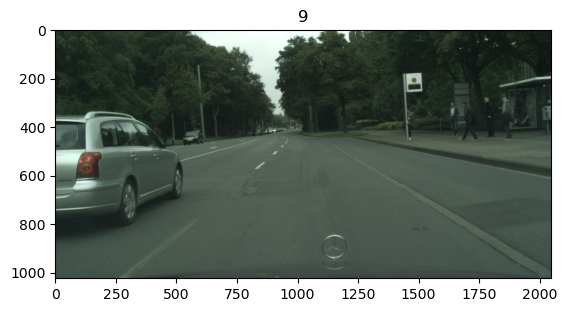

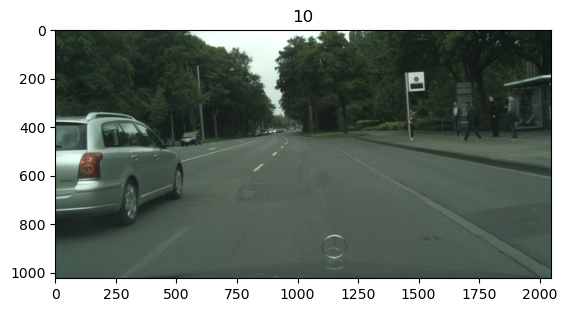

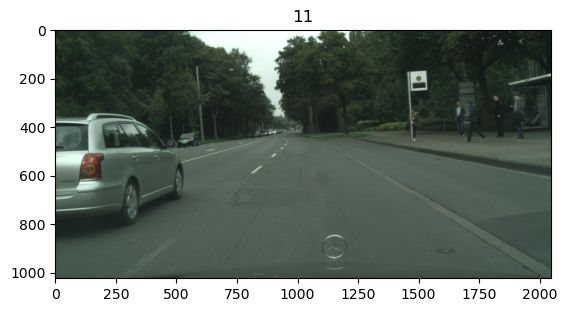

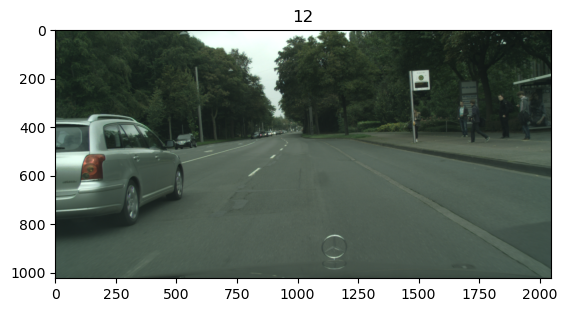

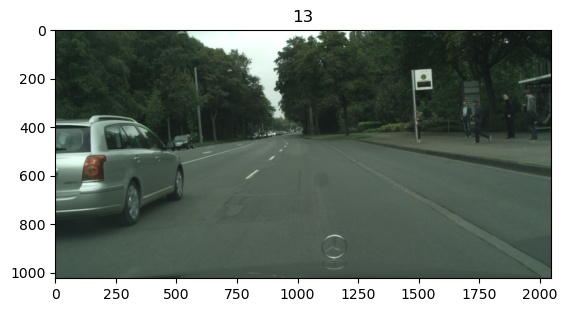

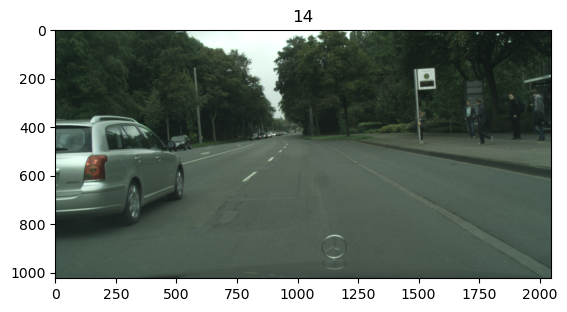

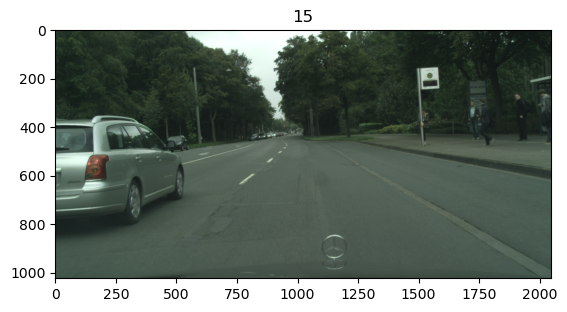

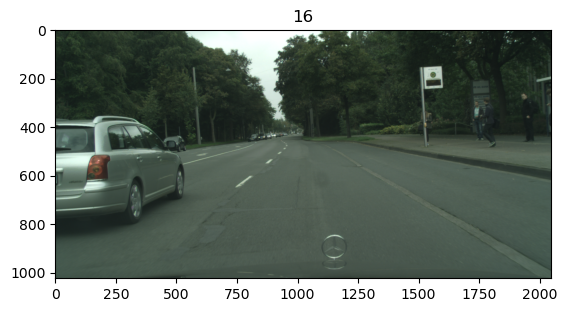

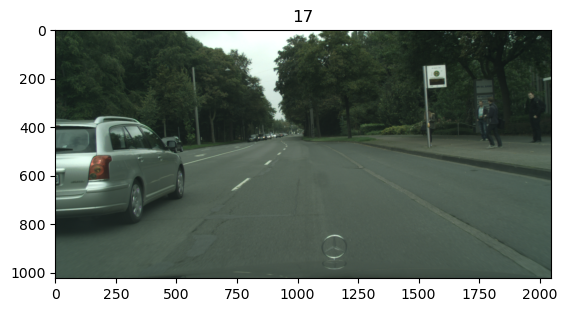

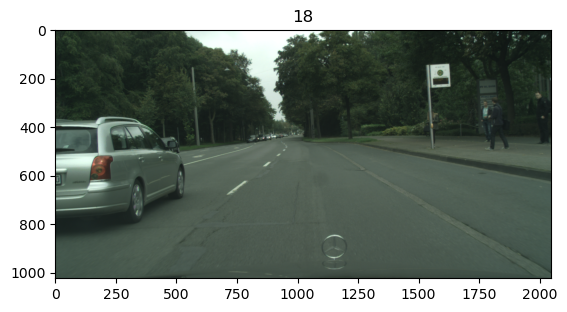

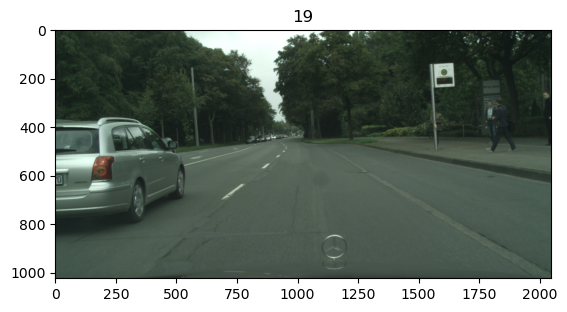

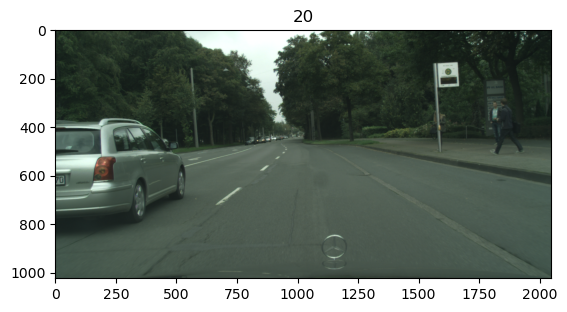

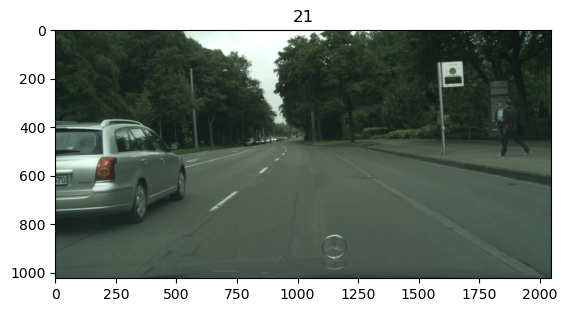

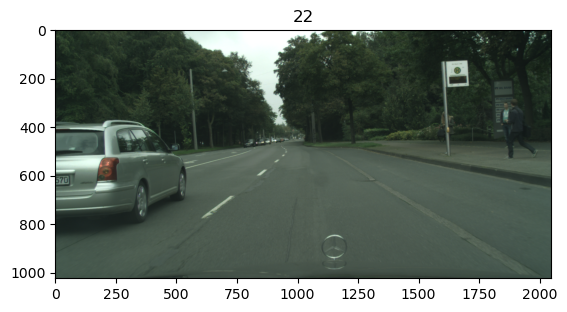

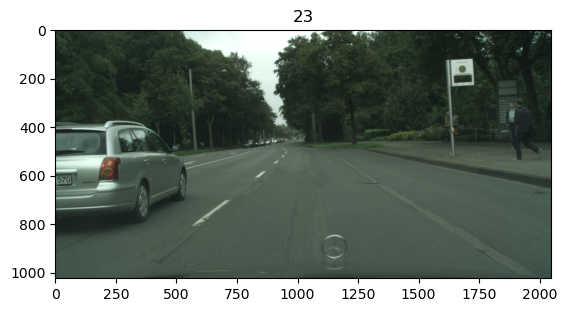

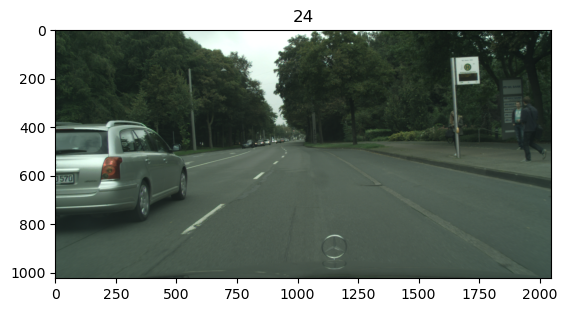

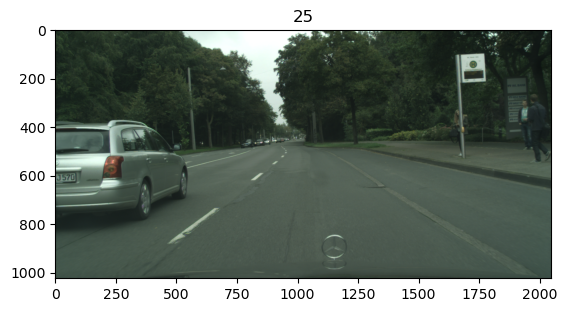

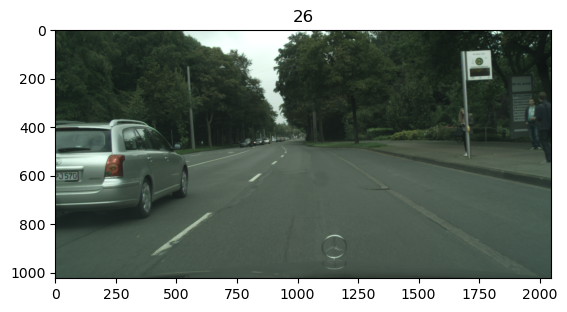

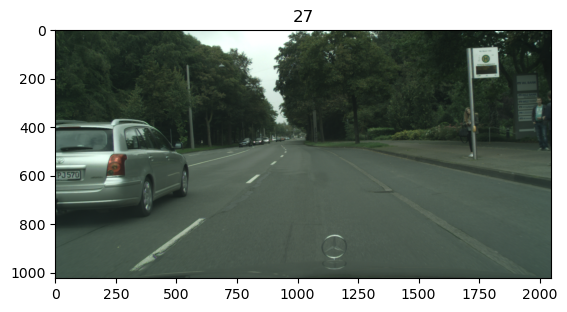

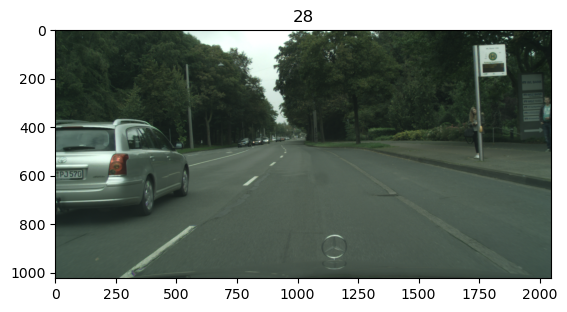

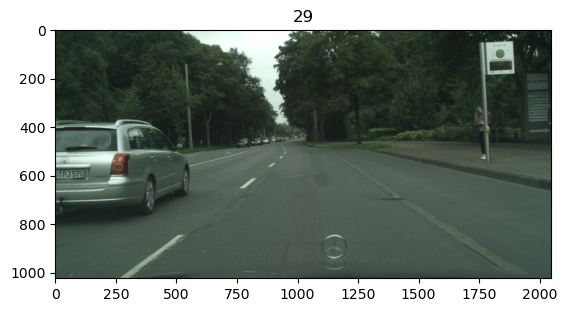

In [6]:
def display_seq(seq):
    for i in range(seq.shape[0]):
        img = seq[i]
        mean = torch.tensor([0.485, 0.456, 0.406]).view( 3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
        img = img * std + mean
        img = img.cpu().permute(1, 2, 0).numpy()
        plt.imshow(img)
        # add number 
        plt.title(i)
        plt.show()

display_seq(test[0])